# 1. Carga de datos

In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set the path to the file you'd like to load
file_path = "./winequality-red.csv"

# Load the latest version from Kaggle
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "uciml/red-wine-quality-cortez-et-al-2009",
    file_path,
)

print("Primeros 5 registros:\n", df.head())

Primeros 5 registros:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5

# 2. Análisis de características

### Lo primero que haremos será la exploración de características con los datos del dataset en crudo para ver todos los outliers y todo en lo que se podría aplicar feature engineering

### Exploración de la estructura del dataset

In [2]:
print("Forma del DataFrame (filas, columnas):", df.shape)
print("\nTipos de datos de cada columna:")
print(df.dtypes)
print("\nPrimeras 10 filas del DataFrame:")
print(df.head(10))
print("\n================================= Información del DataFrame (memoria, tipos de datos) ==============================")
df.info()
print("\n================================= Estadísticas Descriptivas (media, std, min, max) ==============================")
print(df.describe())

Forma del DataFrame (filas, columnas): (1599, 12)

Tipos de datos de cada columna:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Primeras 10 filas del DataFrame:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4 

### Análisis de características (EDA)

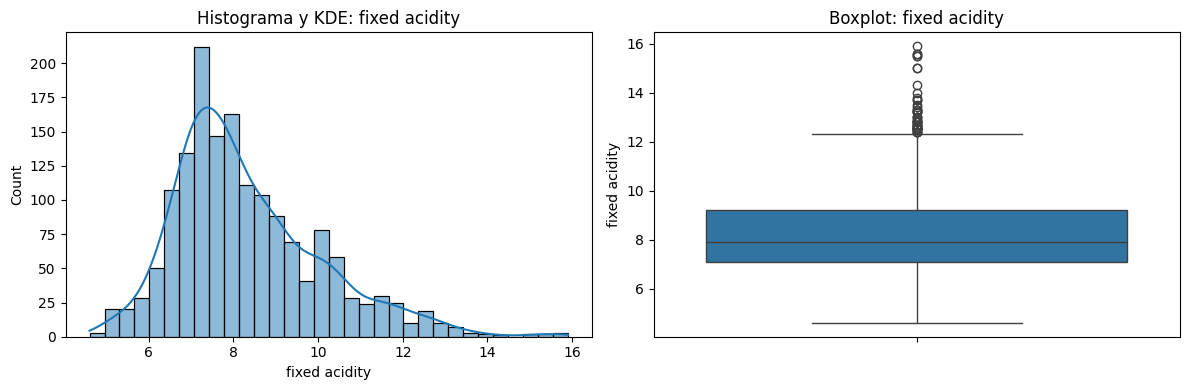

Estadísticos de fixed acidity:
count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64
Asimetría: 0.983, Curtosis: 1.132



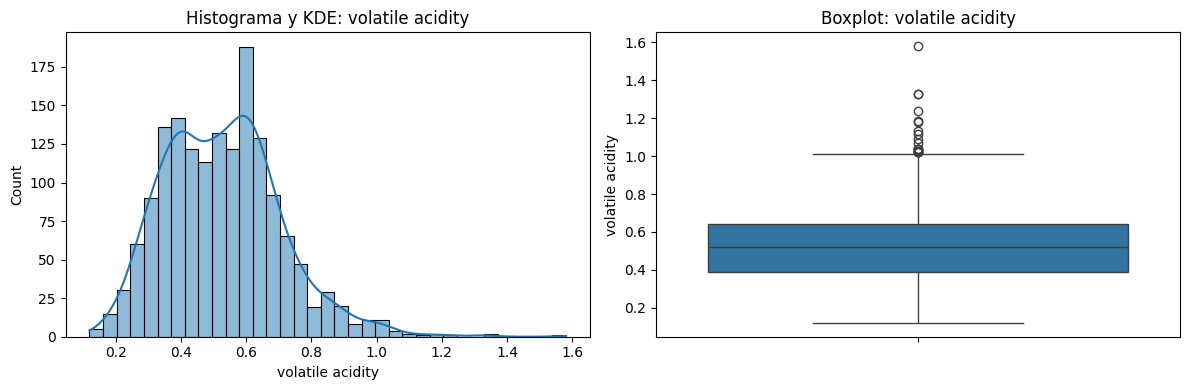

Estadísticos de volatile acidity:
count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64
Asimetría: 0.672, Curtosis: 1.226



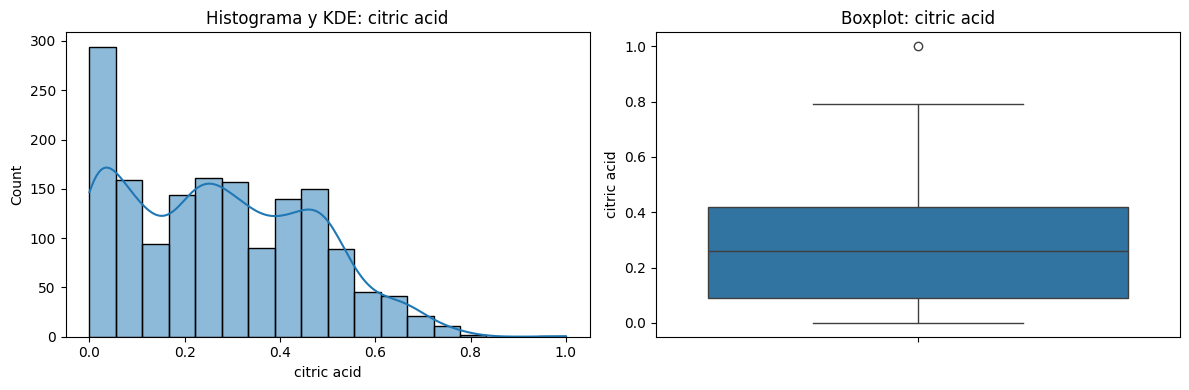

Estadísticos de citric acid:
count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64
Asimetría: 0.318, Curtosis: -0.789



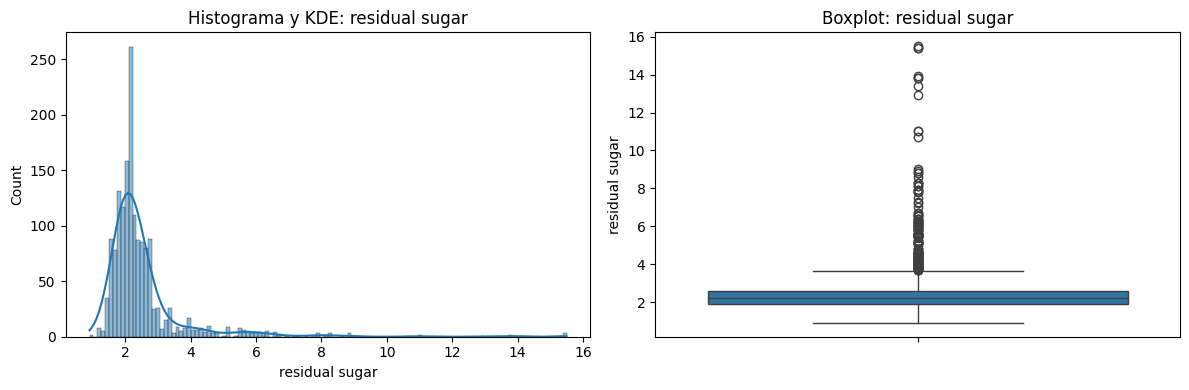

Estadísticos de residual sugar:
count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64
Asimetría: 4.541, Curtosis: 28.618



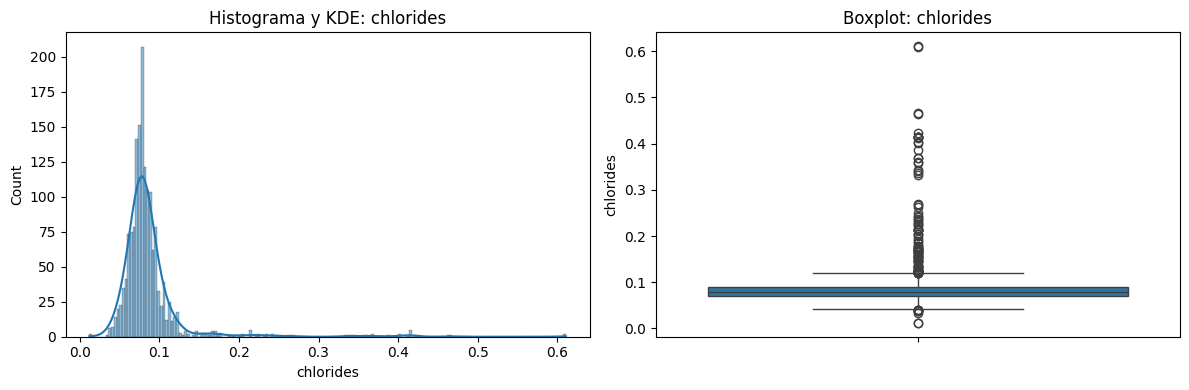

Estadísticos de chlorides:
count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64
Asimetría: 5.680, Curtosis: 41.716



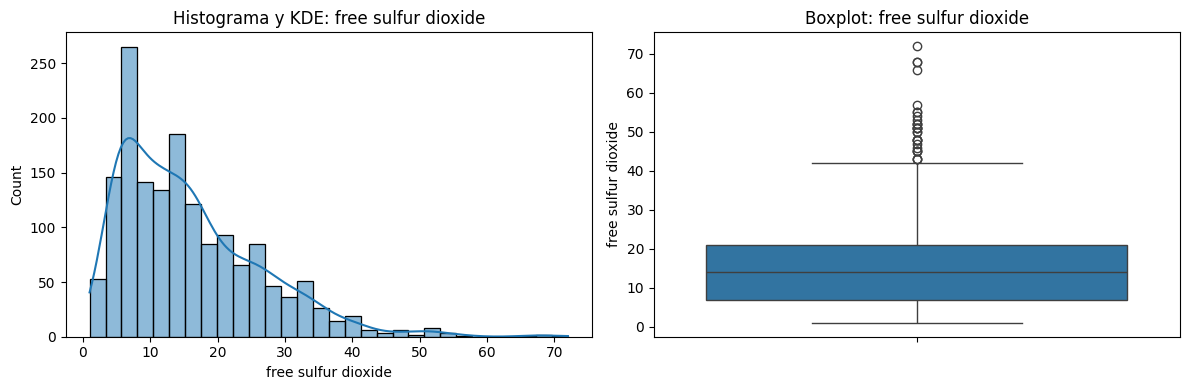

Estadísticos de free sulfur dioxide:
count    1599.000000
mean       15.874922
std        10.460157
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free sulfur dioxide, dtype: float64
Asimetría: 1.251, Curtosis: 2.024



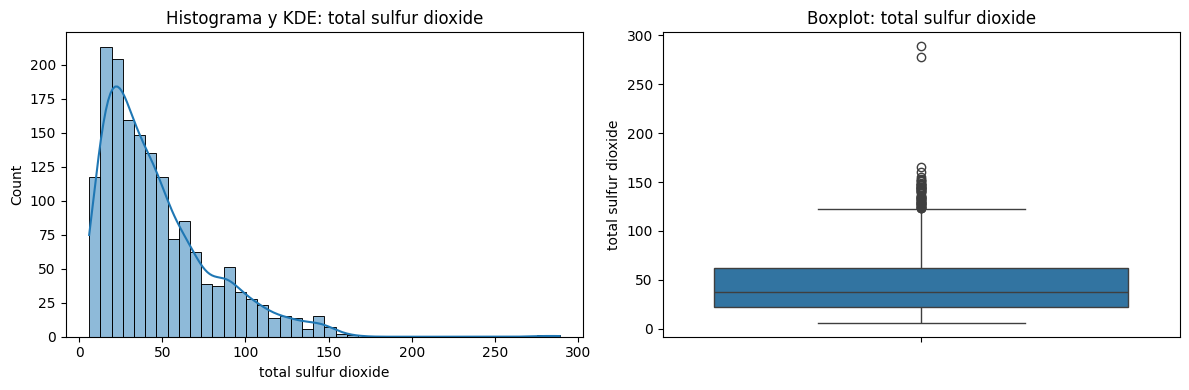

Estadísticos de total sulfur dioxide:
count    1599.000000
mean       46.467792
std        32.895324
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64
Asimetría: 1.516, Curtosis: 3.810



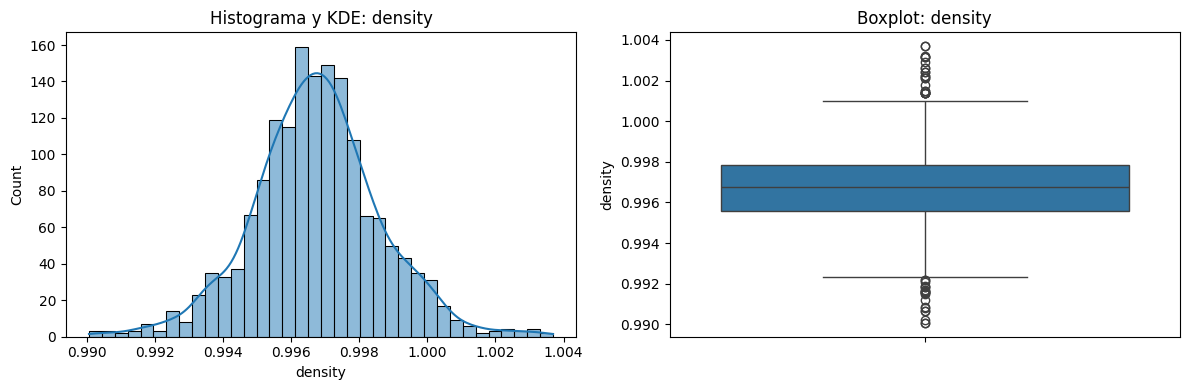

Estadísticos de density:
count    1599.000000
mean        0.996747
std         0.001887
min         0.990070
25%         0.995600
50%         0.996750
75%         0.997835
max         1.003690
Name: density, dtype: float64
Asimetría: 0.071, Curtosis: 0.934



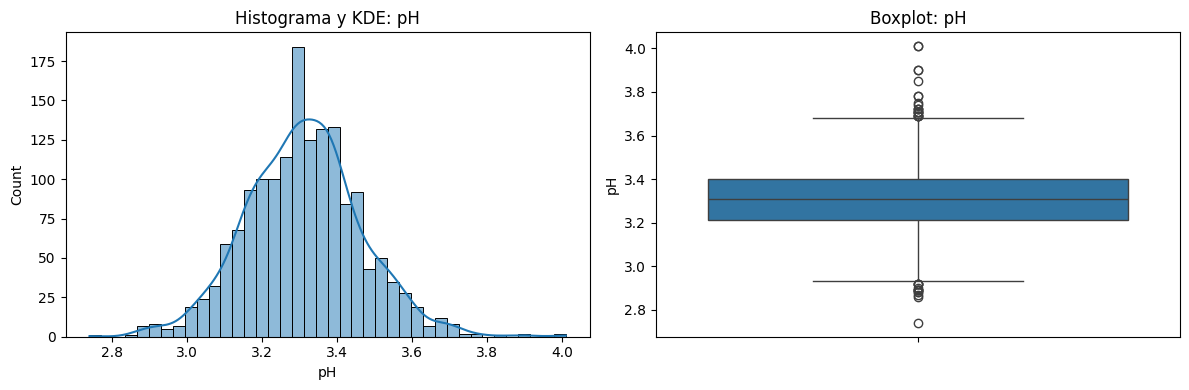

Estadísticos de pH:
count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64
Asimetría: 0.194, Curtosis: 0.807



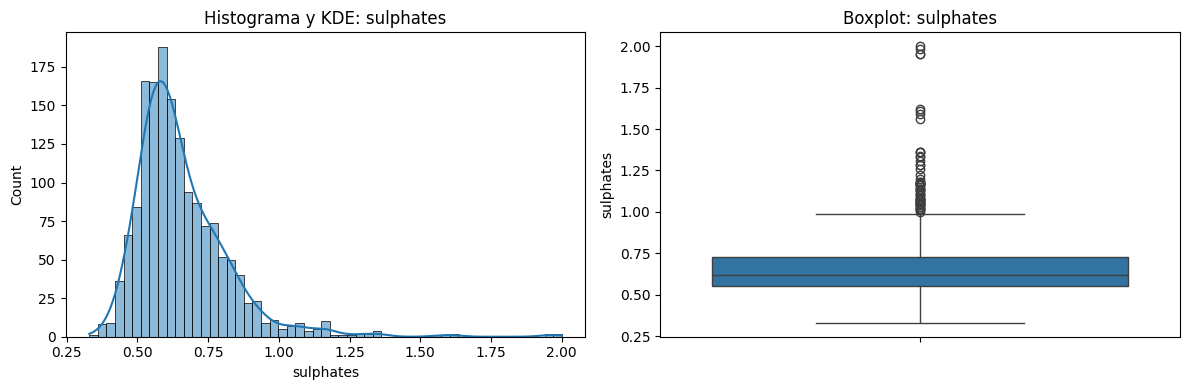

Estadísticos de sulphates:
count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64
Asimetría: 2.429, Curtosis: 11.720



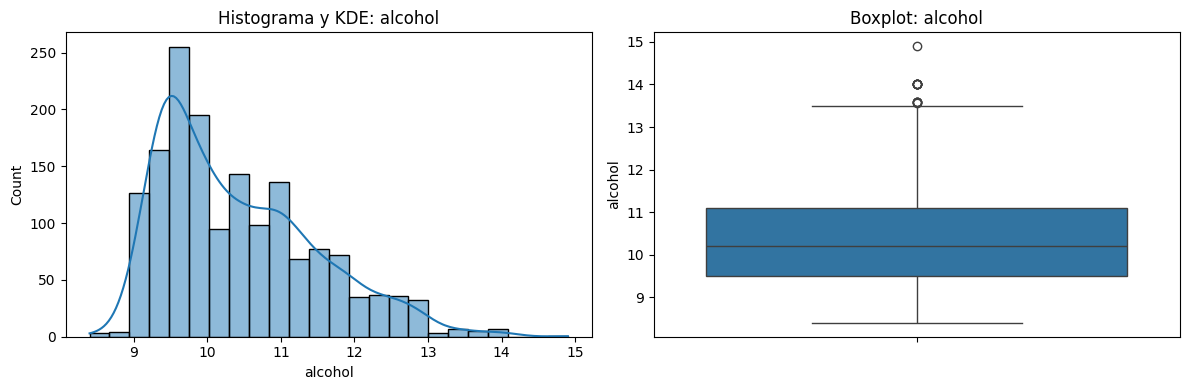

Estadísticos de alcohol:
count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64
Asimetría: 0.861, Curtosis: 0.200



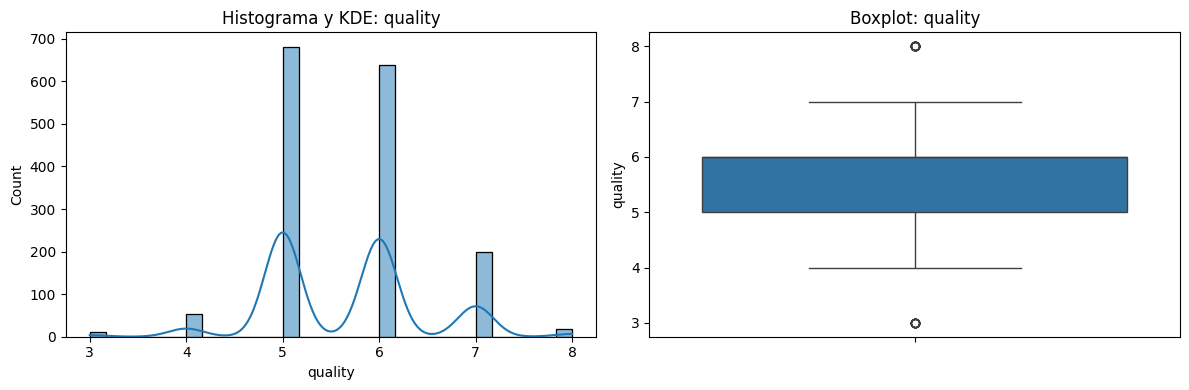

Estadísticos de quality:
count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64
Asimetría: 0.218, Curtosis: 0.297



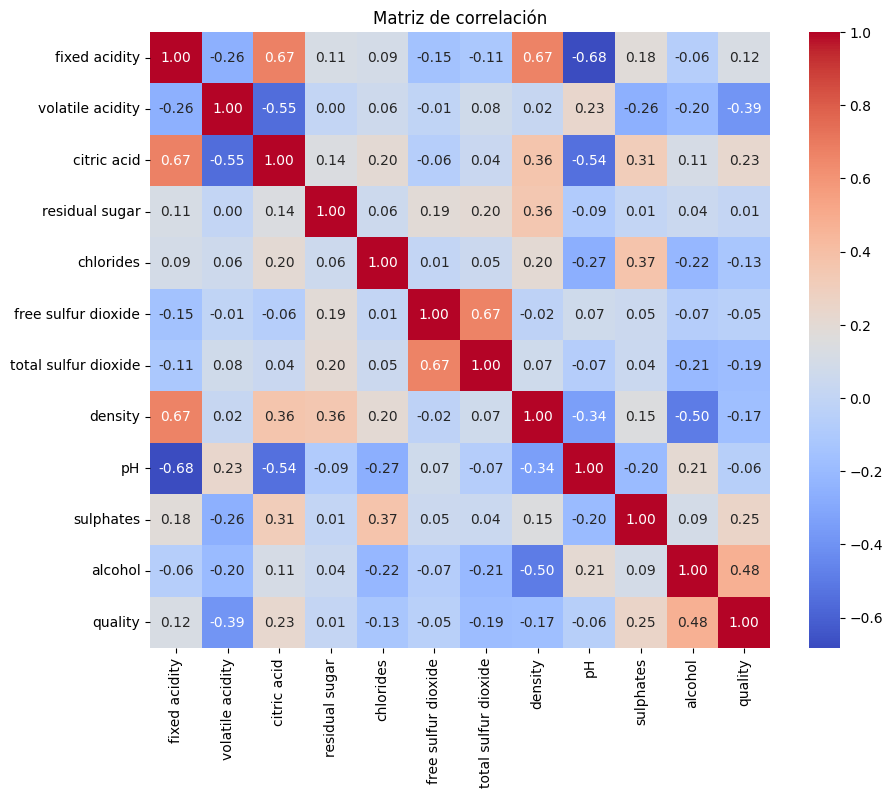

=== Detección de outliers (criterio 1.5*IQR) ===
fixed acidity: 49 outliers
volatile acidity: 19 outliers
citric acid: 1 outliers
residual sugar: 155 outliers
chlorides: 112 outliers
free sulfur dioxide: 30 outliers
total sulfur dioxide: 55 outliers
density: 45 outliers
pH: 35 outliers
sulphates: 59 outliers
alcohol: 13 outliers
quality: 28 outliers

=== Outliers ===
- fixed acidity: Se detectaron 49 valores atípicos.
- volatile acidity: Se detectaron 19 valores atípicos.
- citric acid: Se detectaron 1 valores atípicos.
- residual sugar: Se detectaron 155 valores atípicos.
- chlorides: Se detectaron 112 valores atípicos.
- free sulfur dioxide: Se detectaron 30 valores atípicos.
- total sulfur dioxide: Se detectaron 55 valores atípicos.
- density: Se detectaron 45 valores atípicos.
- pH: Se detectaron 35 valores atípicos.
- sulphates: Se detectaron 59 valores atípicos.
- alcohol: Se detectaron 13 valores atípicos.
- quality: Se detectaron 28 valores atípicos.


In [4]:
num_cols = df.select_dtypes(include=[np.number]).columns

for col in num_cols:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col], kde=True, ax=axs[0])
    axs[0].set_title(f"Histograma y KDE: {col}")
    sns.boxplot(y=df[col], ax=axs[1])
    axs[1].set_title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()
    print(f"Estadísticos de {col}:")
    print(df[col].describe())
    print(f"Asimetría: {df[col].skew():.3f}, Curtosis: {df[col].kurtosis():.3f}\n")

# Matriz de correlación y mapa de calor
corr = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# Identificación de outliers usando el criterio de rango intercuartílico (IQR)
print("=== Detección de outliers (criterio 1.5*IQR) ===")
outlier_report = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    n_outliers = outliers.shape[0]
    outlier_report[col] = n_outliers
    print(f"{col}: {n_outliers} outliers")

print("\n=== Outliers ===")
for col, n_outliers in outlier_report.items():
    if n_outliers > 0:
        print(f"- {col}: Se detectaron {n_outliers} valores atípicos.")
    else:
        print(f"- {col}: No se detectaron valores atípicos significativos.")

## Ahora se eliminarán los datos duplicados y después se normalizará 

### Todo esto se hará para eliminar los outliers y eliminar todo el ruido que pueda hacer nuestro modelo más ineficiente

### Eliminación de datos duplicados
¿Por qué es el primer paso?
Eliminar los datos duplicados al inicio del análisis es importante porque los registros repetidos pueden distorsionar las estadísticas descriptivas, los gráficos y las correlaciones, haciendo que los resultados no reflejen la realidad del fenómeno estudiado. Además, los duplicados pueden causar que el modelo aprenda patrones falsos o sobreentrene, afectando la capacidad de generalización. Por eso, limpiar duplicados antes de explorar y analizar asegura que todo el análisis posterior se base en información verídica y representativa del dataset.

In [5]:
print("Duplicados totales:", df.duplicated().sum())
if df.duplicated().sum() > 0:
    print(df[df.duplicated()])
df = df.drop_duplicates()
print("Duplicados totales después de eliminar:", df.duplicated().sum())

Duplicados totales: 240
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

   

Convertir la columna de quality de int a float

In [7]:
df['quality'] = df['quality'].astype(float)

### Normalización

In [8]:
# Normalización de los datos numéricos con Z-score
df_norm = df.copy()
num_cols = df_norm.select_dtypes(include=[np.number]).columns

for col in num_cols:
    mean = df_norm[col].mean()
    std = df_norm[col].std()
    df_norm[col] = (df_norm[col] - mean) / std

print("---Columnas originales---\n", df.head())
print("\n---Columnas normalizadas---\n", df_norm.head())

---Columnas originales---
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8     

## Análisis de características(EDA) con los datos normalizados